<a href="https://colab.research.google.com/github/alfanadhya/Tugas2-MLP/blob/main/Tugas_2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
import os

# Import images

In [3]:
base_dir = '/content/gdrive/Shareddrives/Tugas ML_MLP/flowers'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory untuk daisy images (train)
train_daisy_dir = os.path.join(train_dir, 'daisy')

# Directory untuk dandelion images (train)
train_dandelion_dir = os.path.join(train_dir, 'dandelion')

# Directory untuk sunflower images (train)
train_sunflower_dir = os.path.join(train_dir, 'sunflower')

# Directory untuk daisy images (test)
test_daisy_dir = os.path.join(test_dir, 'daisy')

# Directory untuk dandelion images (test)
test_dandelion_dir = os.path.join(test_dir, 'dandelion')

# Directory untuk sunflower images (test)
test_sunflower_dir = os.path.join(test_dir, 'sunflower')

In [4]:
print('jumlah train images: ', len(os.listdir(train_daisy_dir)) + len(os.listdir(train_dandelion_dir)) + len(os.listdir(train_sunflower_dir)))
print('jumlah test images: ', len(os.listdir(test_daisy_dir)) + len(os.listdir(test_dandelion_dir)) + len(os.listdir(test_sunflower_dir)))

jumlah train images:  240
jumlah test images:  60


In [111]:
train_daisy_fnames = os.listdir( train_daisy_dir )
train_dandelion_fnames = os.listdir( train_dandelion_dir )
train_sunflower_fnames = os.listdir( train_sunflower_dir )

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

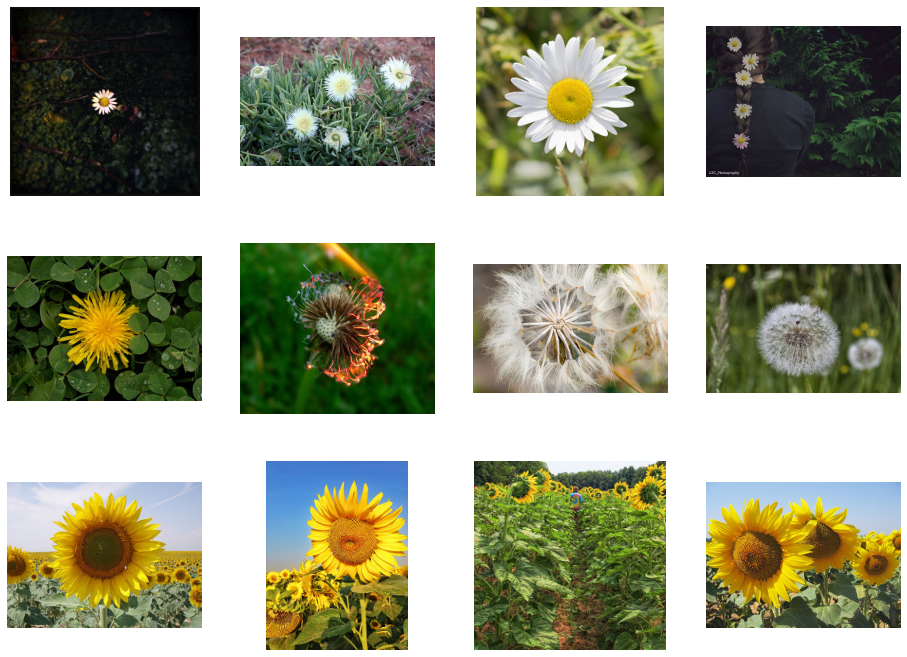

In [112]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

pic_index=4

next_daisy_pix = [os.path.join(train_daisy_dir, fname) 
                for fname in train_daisy_fnames[0:pic_index] 
               ]

next_dandelion_pix = [os.path.join(train_dandelion_dir, fname) 
                for fname in train_dandelion_fnames[0:pic_index]
               ]

next_sunflower_pix = [os.path.join(train_sunflower_dir, fname) 
                for fname in train_sunflower_fnames[0:pic_index]
               ]

for i, img_path in enumerate(next_daisy_pix+next_dandelion_pix+next_sunflower_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Resize images

In [9]:
import cv2
resize_dim = (320,240)

In [41]:
def resize (dir, fnames):
  next_to_resize = [os.path.join(dir, fname) for fname in fnames]
  img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in next_to_resize]

  resized_flower = []

  for i in range(len(img)):
    # Resize to 320x240
    res = cv2.resize(img[i], resize_dim, interpolation=cv2.INTER_LINEAR)

    # Convert to grayscale
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    
    resized_flower.append(gray)
  
  img_size_before = cv2.imread(os.path.join(dir, fnames[1]))

  print("Ambil sampel image[1] untuk cek hasil resize")
  print("--------------------------------------------")
  print("Lebar sebelum: ", img_size_before.shape[1], ", tinggi sebelum: ", img_size_before.shape[0])
  print("Lebar sesudah: ", resized_flower[1].shape[1], ", tinggi sesudah: ", resized_flower[1].shape[0])
  
  return resized_flower

In [42]:
resized_train_daisy = resize(train_daisy_dir, train_daisy_fnames)

Ambil sampel image[1] untuk cek hasil resize
--------------------------------------------
Lebar sebelum:  500 , tinggi sebelum:  333
Lebar sesudah:  320 , tinggi sesudah:  240


In [43]:
resized_train_dandelion = resize(train_dandelion_dir, train_dandelion_fnames)

Ambil sampel image[1] untuk cek hasil resize
--------------------------------------------
Lebar sebelum:  320 , tinggi sebelum:  283
Lebar sesudah:  320 , tinggi sesudah:  240


In [44]:
resized_train_sunflower = resize(train_sunflower_dir, train_sunflower_fnames)

Ambil sampel image[1] untuk cek hasil resize
--------------------------------------------
Lebar sebelum:  180 , tinggi sebelum:  240
Lebar sesudah:  320 , tinggi sesudah:  240


In [103]:
def display(a):
  for i in range(4):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(1, 4, i + 1)
    sp.axis('Off')
    
    # For displaying a grayscale image, set up the colormapping 
    plt.imshow(a[i], cmap='gray')

  plt.show()

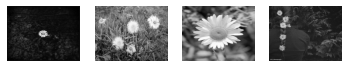

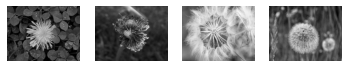

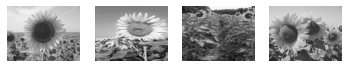

In [106]:
display(resized_train_daisy)
display(resized_train_dandelion)
display(resized_train_sunflower)